# Susceptibility

$$
Z = \sum_n e^{-\beta E_n}\\
m(B) = \frac{1}{\beta Z} \frac{\partial Z}{\partial B}\\
\chi = \lim_{B \to 0} \frac{\partial m}{\partial B}
$$

## Eigenvalues and eigenstates in presence of $\vec B$

### The easy ones: $n=0,1,3,4$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\Delta_{\pm} \equiv \sqrt{v^2 + (\epsilon_d \pm \frac{1}{2}B)^2}\\
\ket{0,0} \text{ and } \ket{2,2}\begin{cases} E_{0} = E_{15} = \frac{1}{4}k \end{cases}\\
\text{ between }\ket{\uparrow,0},\ket{0,\uparrow} \text{ and between }\ket{\uparrow,2},\ket{2,\uparrow}\begin{cases}
E_{1} = E_{11} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B + \Delta_{+}\right)\\
E_{2} = E_{12} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B - \Delta_{+}\right)
\end{cases}\\
\text{ between }\ket{\downarrow,0},\ket{0,\downarrow} \text{ and between }\ket{\downarrow,2},\ket{2,\downarrow}\begin{cases}
E_{3} = E_{13} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B + \Delta_{-}\right)\\
E_{4} = E_{14} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B - \Delta_{-}\right)
\end{cases}\\
$$

### The easy ones in $n=2$

$$
\ket{\uparrow, \uparrow}: E_5 = \epsilon_d + \frac{1}{4}j + \frac{1}{2}B\\
\ket{\downarrow, \downarrow}: E_6 = \epsilon_d + \frac{1}{4}j - \frac{1}{2}B\\
\ket{\text{charge triplet 0}}: E_7 = \frac{1}{4}k\\
$$

### The remaining subspace

$$
\begin{pmatrix}
    \epsilon_d+\frac{1}{4}j & B & 0\\
    B & \epsilon_d - \frac{3}{4}j & -2v\\
    0 & -2v & -\frac{3}{4}k
\end{pmatrix}
$$
The basis is: $\ket{\text{spin trip. } 0}, \ket{\text{spin singl.}}, \ket{\text{charge singl.}}$

The next step is to diagonalize this matrix.

In [12]:
from sympy import *
init_printing(use_unicode=True)
ed,j,k,v,B,E,beta,x = symbols('ed J k v B E beta x')

In [13]:
M = Matrix([[ed + j/4, B, 0], [B, ed - 3*j/4, -2*v], [0, -2*v, -3*k/4]])
charp = M.charpoly(x)
sols = solve(charp, x)

In [14]:
delta_p = sqrt(v**2 + (ed + B/2)**2)
delta_m = sqrt(v**2 + (ed - B/2)**2)
Es = [[]]*16
Es[0] = Es[15] = k/8 + k/8
Es[1] = Es[11] = (ed + B/2 + delta_p)/2
Es[2] = Es[12] = (ed + B/2 - delta_p)/2
Es[3] = Es[13] = (ed - B/2 + delta_m)/2
Es[4] = Es[14] = (ed - B/2 - delta_m)/2
Es[5] = ed + j/4 + B/2
Es[6] = ed + j/4 - B/2
Es[7] = k/4
Es[8] = sols[0]
Es[9] = sols[1]
Es[10] = sols[2]

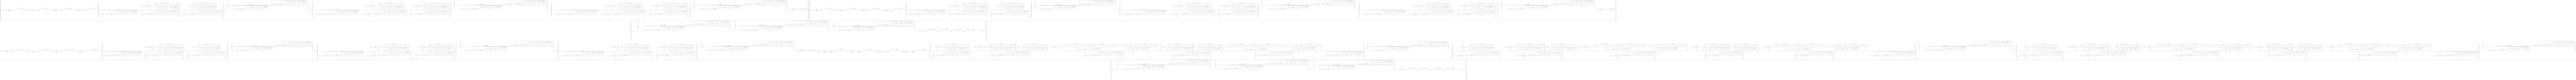

In [15]:
Z = 0
for E in Es:
    Z += exp(-beta*E)
m = (1/beta)*diff(Z, B)/Z
chi_B = diff(m, B)
chi_B.subs({ed:0, v: 0, k: 0})

In [16]:
chi = limit(chi_B, B, 0)